<table style="width :100%;">
    <td style="width : 7.5%;">
        <img style="float: left;
                width: 75px;"
         src="https://upload.wikimedia.org/wikipedia/fr/d/d9/Logo_T%C3%A9l%C3%A9com_ParisTech.svg" />
    </td>
    <td style="width : 15%;">
        TELECOM PARIS<br />2021/2022<br /><br /> MDI720<br />Mme Anne Sabourin
    </td>
    <td>
        <h1><center>STATISTIQUES<br /><br />TP2 : Régression Linéaire</center></h1>
    </td>
    <td style="width : 12.5%;">
        Victor LEDEZ <br />Date TP : 2021/10/29<br /><br /> Date CR : 2021/11/10<br /> Version : 1
    </td>
</table>

Vous devez déposer votre fichier, sous format nomdefamille.ipynb, sur le site ecampus avant le 10/11, 23h59 sur ecampus dans l’espace de rendu dédié. Pour que la correction par les pairs soit possible, aucun retard ne sera toléré (en l’absence de rendu à la date limite la note attribuée sera zéro). La correction par les pairs se fera selon les mêmes modalités qu’au premier TP noté. Ne tenez pas compte du barême pour la correction, notez toujours sur 2 points chaque question, la pondération s’effectue automatiquement dans la feuille excel. Date limite de rendu de la correction : le 21/11 23h59.


<hr/>

> Nous travaillons sur la base de données diabetes de python. La base initiale comporte n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 150 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement mélangé les variables entre elles de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données notée X comporte n = 442 patients et p = 160 covariables. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?

<hr/>

In [41]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.model_selection
import seaborn as sns
import pandas as pd
import numpy as np
import random
import scipy


In [84]:
FIG_SIZE = (10, 6)
FILE = 'data_contamine.csv'
TRUE_VARIABLES = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]

<hr>

## Question 1

<hr>

> Importer la base de données data_contamine.csv disponible depuis le lien https://github.com/anassag/TP-reduction-dimension/blob/main/data_contamine.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Vérifiez le nombre de variables explicatives et le nombre d’observations. (1 point)

In [3]:

df = pd.read_csv(FILE, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.223773,2.407005,-0.536073,-1.336626,-0.097947,1.549540,1.590890,1.190101,-1.181936,2.731036,...,-1.157572,-0.316955,-1.041194,-0.929746,-1.779339,-1.429081,2.685259,0.953334,-0.564672,151.0
1,-0.515789,-0.799958,1.582195,-0.008126,0.414271,1.363709,-0.098582,-0.302917,-0.544602,-0.241896,...,0.241794,-0.937335,0.288955,-0.177624,0.084456,0.633965,1.052004,-0.113860,0.505908,75.0
2,0.023454,0.048646,0.224159,0.655717,-0.176065,1.605403,1.638630,-1.240650,2.100396,-1.031570,...,0.483655,0.869513,0.881769,-0.958674,1.880679,0.608850,-0.057137,-0.950829,-0.594289,141.0
3,0.892292,-0.494714,-1.062153,0.736429,-0.118200,-1.078412,-0.454316,-0.378080,2.679422,-0.051751,...,0.385350,-0.021720,0.863478,0.256292,0.293780,0.216499,-0.637889,-1.179666,-1.112571,206.0
4,-1.021634,-1.805761,0.082164,0.387965,-0.838219,1.596253,0.037945,-1.012175,1.632963,-0.533814,...,0.661239,0.329027,-0.757433,0.082726,0.267892,0.282614,-2.022049,-2.201643,0.786962,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.099858,-1.783441,-1.563688,0.115844,0.950344,-2.001312,-0.983234,-1.303273,-1.245733,-0.836314,...,0.149098,0.233905,-2.350869,-0.119769,-2.173684,-0.569853,-1.395913,0.064790,0.902037,178.0
438,-1.354643,0.049047,-1.601002,0.300223,-1.606891,0.438829,3.302048,1.134504,2.407917,1.273360,...,-0.549098,-0.225446,0.778094,1.037341,2.220547,0.435243,1.060447,0.967322,-3.642062,104.0
439,0.724236,2.924964,0.427710,-0.727469,0.740514,0.453221,0.581068,-0.044940,-0.206191,0.671804,...,-1.018713,1.631551,0.907589,-0.785107,1.140840,0.638379,0.952108,0.977634,-0.868044,132.0
440,-0.682602,-0.936907,-0.088368,-0.046932,-0.283095,0.359248,-1.415857,0.297645,-0.415684,-0.590617,...,0.719171,-0.632305,1.252630,0.343075,-0.158593,-3.155686,-0.154837,0.754478,1.358309,220.0


Nous avons bien nos 160 variables explicatives ainsi que nos 442 échantillons qui correspondent a nos patients

<hr>

## Question 2

<hr>

> Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus. (1.5 point)

In [4]:
df_nbr_X = len(df.columns) - 2
df_nbr_X

159

In [5]:
indexes = random.sample(range(0, df_nbr_X), 4)

data_test = {
    f'X{indexes[0]}': df[indexes[0]],
    f'X{indexes[1]}': df[indexes[1]],
    f'X{indexes[2]}': df[indexes[2]],
    f'X{indexes[3]}': df[indexes[3]],
    'Y': df[160]
}

df_test = pd.DataFrame(data_test)

df_test


,X86,X56,X100,X48,Y
0,0.270331,-0.616109,-0.835264,1.245344,151.0
1,-1.382906,1.190816,-0.734295,-0.232553,75.0
2,-1.667665,1.530552,0.078596,0.136298,141.0
3,0.347125,-0.409685,-1.424811,0.187345,206.0
4,-2.683181,1.974899,0.758351,-1.659560,135.0
...,...,...,...,...,...
437,2.655881,-0.387804,0.379207,0.642736,178.0
438,-1.949115,-1.345582,0.322461,-1.200770,104.0
439,0.436953,-0.997800,-0.355169,0.590683,132.0
440,1.065180,0.363528,0.882511,1.343242,220.0


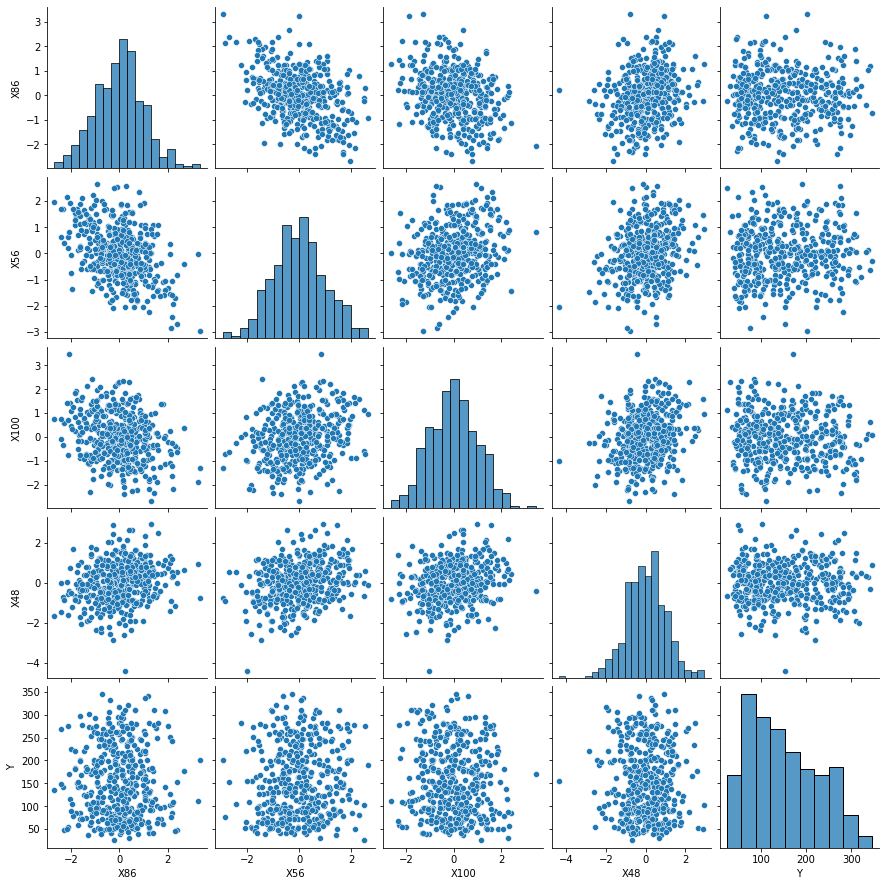

In [6]:
sns.pairplot(df_test)

Face a ces résultats nous pouvons constater que les variables explicatives sont centrées puisque leurs moyennes sont proches de 0. Nous pouvons le redémontrer par le calcule de l'écart-type et la moyenne :

In [7]:
X_mean = [df_test[f'X{index}'].mean() for index in indexes]
X_standard = [df_test[f'X{index}'].std() for index in indexes]

print(f'Variables explicatives centrées ? : {np.allclose(X_mean, 0, rtol=0.001)}\n\
Variables explicatives réduites ? : {np.allclose(X_standard, 1, rtol=0.01)}\n')


Variables explicatives centrées ? : True
Variables explicatives réduites ? : True



In [8]:
Y_mean = df_test.Y.mean()
Y_standard = df_test.Y.std()

print(f'Variable à expliquer centrée ? : {np.allclose(Y_mean, 0, rtol=1)}\n\
Variable à expliquer réduite ? : {np.allclose(Y_standard, 1, rtol=1)}\n')


Variable à expliquer centrée ? : False
Variable à expliquer réduite ? : False



Ainsi, par le calcule et le scatterplot, nous constatons que le les variables explicatives sont centrées et normalisées. Ceci n'est pas le cas de la variable a expliquer qui n'est ni centrée ni réduite.

<hr>

## Question 3

<hr>

> Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain, un pour tester le modèle Xtest. On mettra 25% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas normalisé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régressions. (1 point)

In [9]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=1)

print(f'X_train : {X_train.shape}, et X_test : {X_test.shape}')
print(f'Les variables explicatives sont elles centrées ? {np.allclose(X_train.mean(), 0)}')
print(f'Les variables explicatives sont elles réduites ? {np.allclose(X_train.std(), 1, atol=1e-02)}')


X_train : (331, 160), et X_test : (111, 160)
Les variables explicatives sont elles centrées ? False
Les variables explicatives sont elles réduites ? False


<hr>

## Question 4

<hr>

> Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 20 variables dans la suite. (1.5 point)


In [10]:
X_train_cov = X_train.cov()
X_train_cov

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.994237,0.245194,-0.008469,0.296547,0.075097,-0.124445,0.126891,0.298091,-0.111540,-0.086913,...,-0.045151,0.122868,0.194620,0.152486,-0.040069,0.209279,0.276082,-0.091867,0.081575,-0.099210
1,0.245194,0.992317,0.167901,-0.231727,0.011781,0.204074,0.241465,-0.010214,-0.177610,0.066843,...,-0.061512,0.171913,0.165960,-0.031592,0.055093,0.118715,0.146620,0.144814,0.170118,-0.172648
2,-0.008469,0.167901,0.984423,-0.124321,0.265815,0.342142,-0.288986,0.081610,-0.195913,-0.282007,...,0.035504,-0.284997,-0.057271,0.419181,0.077039,0.054059,0.122122,0.218179,0.039168,0.318879
3,0.296547,-0.231727,-0.124321,1.021179,0.121566,-0.299333,0.108324,0.485881,0.082171,-0.231262,...,-0.248342,-0.257199,0.210781,-0.254188,-0.015653,0.353904,0.132259,0.142367,-0.125940,0.011772
4,0.075097,0.011781,0.265815,0.121566,0.994628,-0.253008,-0.107020,-0.326900,-0.412284,-0.034456,...,-0.056354,-0.244938,0.363707,0.132957,0.000779,0.079927,-0.085130,0.100497,0.131012,0.220487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.209279,0.118715,0.054059,0.353904,0.079927,-0.125993,0.283035,0.131261,0.181768,-0.220070,...,-0.054259,0.092168,0.204362,0.422435,-0.015517,1.011408,0.027020,0.076634,-0.014193,-0.208827
156,0.276082,0.146620,0.122122,0.132259,-0.085130,-0.129322,-0.042889,0.050482,0.198512,-0.119662,...,0.097937,-0.245635,-0.084700,0.051629,-0.051240,0.027020,0.965408,0.026490,0.036285,-0.082605
157,-0.091867,0.144814,0.218179,0.142367,0.100497,0.018849,0.166222,0.271168,-0.189566,0.169646,...,-0.609611,-0.373653,-0.136120,0.039304,-0.015630,0.076634,0.026490,0.997176,0.023657,-0.030419
158,0.081575,0.170118,0.039168,-0.125940,0.131012,0.006083,0.101000,0.278753,-0.581738,0.072414,...,0.120574,-0.073278,-0.165884,0.222149,-0.143919,-0.014193,0.036285,0.023657,0.973493,0.100711


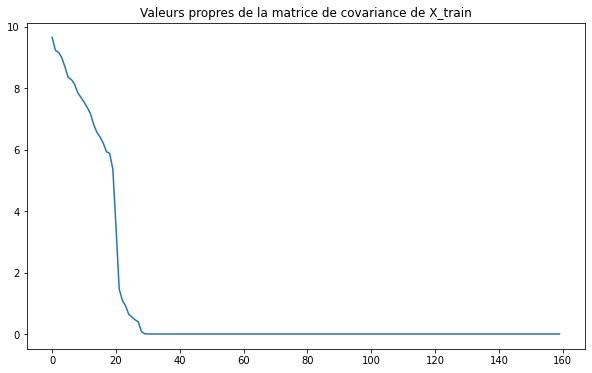

In [11]:
eigen_values, eigen_vectors = np.linalg.eigh(X_train_cov)

eigen_values_reversed = eigen_values[::-1]

plt.figure(2, figsize=FIG_SIZE)
plt.title('Valeurs propres de la matrice de covariance de X_train')
plt.plot(eigen_values_reversed)


Il est utile des garder les 20 premieres varialbles puisqu'elles covarient avec le variable a expliquer. Ainsi, nous aurons plus de chance de retomber sur nos 10 covariables d'origines.

<hr>

## Question 5

<hr>

> Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et XtrainVp1:20q, où Vp1:20q contient les vecteurs propres (associés aux 20 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique. (1 point)

### 5.1. Méthode PCA before OLS

In [12]:
# Initialisation et entraînement du modèle en gardant le 20 premieres variables qui covarient le plus
pca_trained = PCA(n_components=20).fit(X_train)
V_1_20 = pca_trained.components_

# Application au modèle OLS
X_pca = X_train @ V_1_20.T
lin_reg_pca_ols = LinearRegression(fit_intercept=True).fit(X_pca, Y_train)

coef_pca_ols = lin_reg_pca_ols.coef_.squeeze()


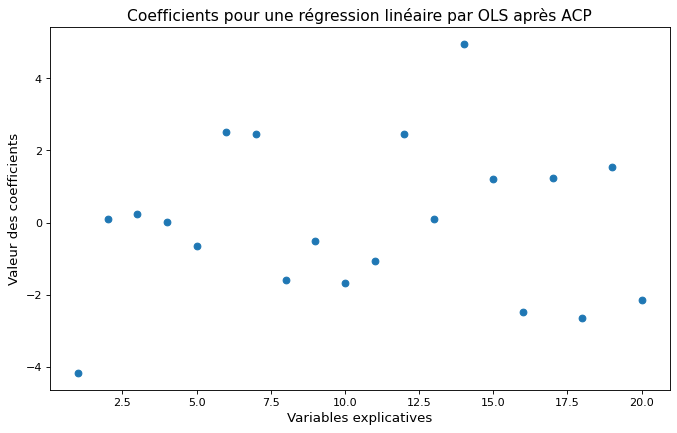

In [13]:
plt.figure(figsize=FIG_SIZE, dpi=80)

X_abscissa = np.linspace(1, 20, 20)
plt.scatter(X_abscissa, coef_pca_ols)

plt.title("Coefficients pour une régression linéaire par OLS après ACP", fontsize=14)
plt.xlabel('Variables explicatives', fontsize=12)
plt.ylabel("Valeur des coefficients", fontsize=12)
plt.show()


### 5.2. Méthode des moindres carrés classique

In [14]:
lin_reg_ols = LinearRegression(fit_intercept=True).fit(X_train, Y_train)

coef_ols = lin_reg_ols.coef_.squeeze()

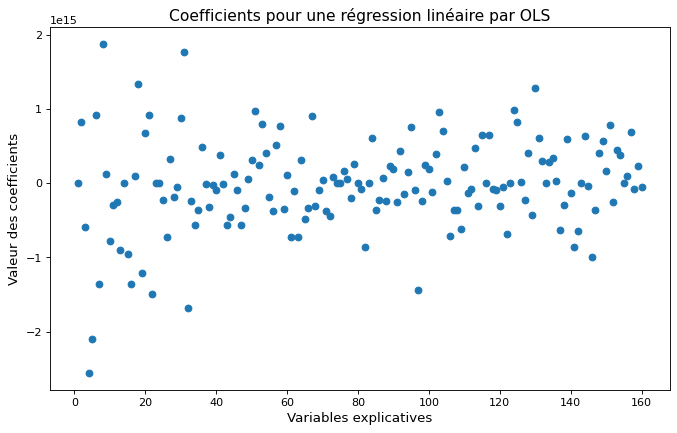

In [40]:
plt.figure(figsize=FIG_SIZE, dpi=80)

X_abscissa = np.linspace(1, 160, 160)
plt.scatter(X_abscissa, coef_ols)

plt.title("Coefficients pour une régression linéaire par OLS", fontsize=14)
plt.xlabel('Variables explicatives', fontsize=12)
plt.ylabel("Valeur des coefficients", fontsize=12)
plt.show()

<hr>

## Question 6

<hr>

> Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sur le train. (1 point)

In [57]:
print(f'La valeur moyenne de Y_train est : {Y_train.mean():.2f}')

print(f'Valeur de l\'intercept avec la méthode OLS : {lin_reg_ols.intercept_:.2f}')
print(
    f'Valeur de l\'intercept avec la méthode PCA before OLS : {lin_reg_pca_ols.intercept_:.2f}')


La valeur moyenne de Y_train est : 153.66
Valeur de l'intercept avec la méthode OLS : 150.61
Valeur de l'intercept avec la méthode PCA before OLS : 153.37


Nous observons que la valeur de l'intercept avec la méthode OLS n'est pas la meme que celle avec la méthode "PCA before OLS". Cela s'explique par le fait que la méthode OLS prend en compte plus de variables, qui ne sont pas suceptibent de covarier avec Y_train, que la "PCA before OLS" dans il y a une plus grande erreur. Ainsi, la méthode "PCA before OLS" est plus précise.

Maintenant, nous allons centrer et réduire les variables après ACP (de petite dimension) et faire une régression avec ces variables en vérifiant que l’intercept est bien égal à la moyenne de Y sur le train.

In [56]:
X_train_20 = scale(X_pca)

lin_reg = LinearRegression(fit_intercept=True).fit(X_train_20, Y_train)

print(f'Moyenne du Y_train : {Y_train.mean():.2f}')
print(f'Intercept de la PCA : {lin_reg.intercept_:.2f}')


Moyenne du Y_train : 153.66
Intercept de la PCA : 153.66


L'intercept de la PCA est bien égale a la moyenne du Y_train

<hr>

## Question 7

<hr>

> Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test. (1.5 point)

In [18]:
# V_1_20 sont les 20 vecteurs propres choisit
X_test_20 = X_test @ V_1_20.T

residual_ols = lin_reg_ols.predict(X_test) - Y_test
residual_pca_ols = lin_reg_pca_ols.predict(X_test_20) - Y_test

risk_ols = np.sum((residual_ols) ** 2) / len(Y_test)
risk_pca_ols = np.sum((residual_pca_ols) ** 2) / len(Y_test)


Text(0, 0.5, 'résidus')

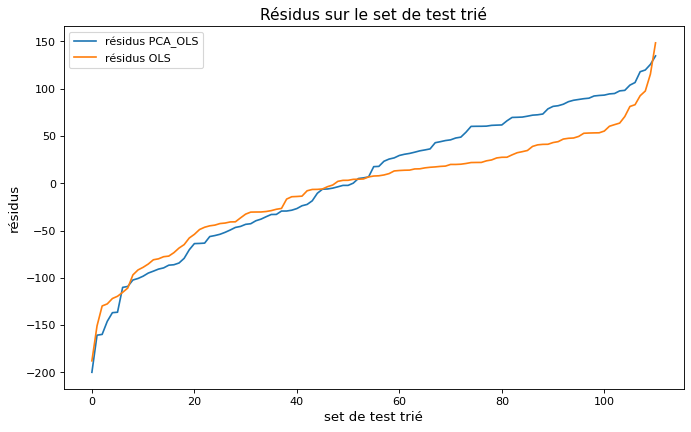

In [19]:
plt.figure(figsize=FIG_SIZE, dpi=80)

plt.plot(np.sort(residual_pca_ols), label='résidus PCA_OLS')
plt.plot(np.sort(residual_ols), label='résidus OLS')
plt.legend()
plt.title("Résidus sur le set de test trié", fontsize=14)
plt.xlabel('set de test trié', fontsize=12)
plt.ylabel("résidus", fontsize=12)


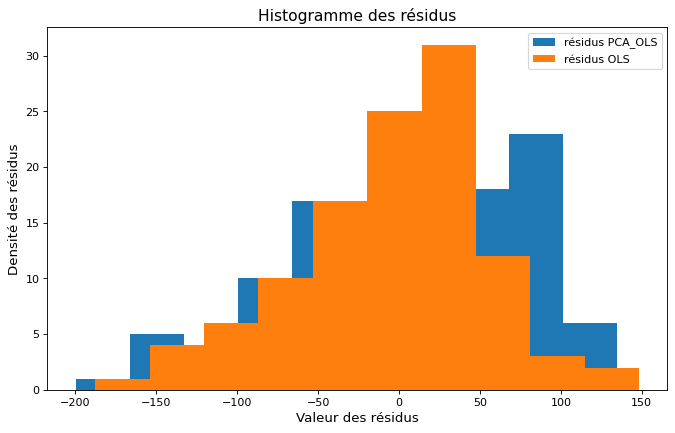

In [20]:

plt.figure(figsize=FIG_SIZE, dpi=80)

plt.hist(residual_pca_ols, label='résidus PCA_OLS')
plt.hist(residual_ols, label='résidus OLS')
plt.title("Histogramme des résidus", fontsize=14)
plt.xlabel('Valeur des résidus', fontsize=12)
plt.ylabel("Densité des résidus", fontsize=12)
plt.legend()


In [54]:
print(
    f'Valeur du coefficien de détermination avec la méthode OLS : {lin_reg_ols.score(X_test, Y_test):.2f}')
print(
    f'Valeur du coefficien de détermination avec la méthode PCA before OLS : {lin_reg_pca_ols.score(X_test_20, Y_test):.2f}')

print('-----------------------------------')

print(f'Valeur du risque avec la méthode OLS : {risk_ols:.2f}')
print(f'Valeur du risque avec la méthode PCA before OLS : {risk_pca_ols:.2f}')


Valeur du coefficien de détermination avec la méthode OLS : 0.34
Valeur du coefficien de détermination avec la méthode PCA before OLS : -0.07
-----------------------------------
Valeur du risque avec la méthode OLS : 3423.28
Valeur du risque avec la méthode PCA before OLS : 5591.98


<hr>

## Question 8

<hr>

> Coder la méthode de Forward variable sélection. On pourra utiliser la statistique du test de nullitédu coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arrêt sur la méthode, c’est-à-dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Sachant que le jeu de données initiales ne contenait que les variables [22, 82, 23, 132, 154, 79, 115, 73, 122, 13], combien Forward en a-t-il retrouvé ? (3 points)

In [22]:
def get_residual_variable(Y, X, regression):
    return np.sum((Y - regression.predict(X)) ** 2) / (len(X) - 1)


def get_ttest(Y, X, regression):
    return np.sqrt(len(X)) * regression.coef_[0] / np.sqrt((get_residual_variable(Y, X, regression)))


def get_pvalue(Y, X, regression):
    return 2 * scipy.stats.t.sf(x=np.abs(get_ttest(Y, X, regression)), df=(len(X)-1))


In [23]:
def forward_variable_selected(Y, X, K):
    num_var = []

    for k in range(K):
        dictionary_pvalue = {}

        for i in range(X.shape[1]):
            if i not in num_var:
                regression = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(
                    X[:, i].reshape(-1, 1), Y.reshape(-1, 1))
                dictionary_pvalue[i] = get_pvalue(Y.reshape(-1, 1), X[:, i].reshape(-1, 1), regression)
        
        num_var.append(min(dictionary_pvalue, key=dictionary_pvalue.get))

    return num_var


In [83]:
forward_variable = forward_variable_selected(df.iloc[:, -1].values, df.iloc[:, :-1].values, 10)
forward_intersect_variable = list(
    set(forward_variable).intersection(TRUE_VARIABLES))


In [82]:

print(f'Le jeu initial contenait les variables {TRUE_VARIABLES}.')
print(f'Pour K = 10, la méthode forward a trouvé les suivantes : {forward_variable}.\n')
print(f'Parmi le jeu initial, la méthode forward a retrouvé : {forward_intersect_variable},\nsoit {len(forward_intersect_variable)} / {len(TRUE_VARIABLES)} variables')


Le jeu initial contenait les variables [22, 82, 23, 132, 154, 79, 115, 73, 122, 13].
Pour K = 10, la méthode forward a trouvé les suivantes : [23, 122, 132, 73, 115, 13, 154, 22, 79, 12].

Parmi le jeu initial, la méthode forward a retrouvé : [132, 122, 73, 13, 79, 115, 22, 23, 154],
soit 9 / 10 variables


<hr>

## Question 9

<hr>

> Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu sur l’échantillon test et le comparer à ceux de OLS et PCA before OLS. (1.5 point)

In [26]:
# Training the Linear Regressor on the training data
X = X_train[forward_variable]
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, Y_train)
θ = lin_reg.coef_
Y_train_predicted = lin_reg.predict(X)

# Testing the Linear Regressor on the test data
X_t = X_test[forward_variable]
Y_test_predicted = lin_reg.predict(X_t)

risk_forward = ((Y_test_predicted - Y_test)**2).sum() / len(Y_test)

In [53]:

print(
    f'Le risque de prédiction par méthode Forward Variable Selection puis OLS est : {risk_forward:.2f}')
print(f'\nRappel des risques : ')
print(f'Avec la méthode OLS : {risk_ols:.2f}')
print(f'Avec la méthode "PCA before OLS" : {risk_pca_ols:.2f}')


Le risque de prédiction par méthode Forward Variable Selection puis OLS est : 3009.72

Rappel des risques : 
Avec la méthode OLS : 3423.28
Avec la méthode "PCA before OLS" : 5591.98


Nous observons que le risque par FVS puis OLS et bien plus faible que celui du "PCA before OLS" et un peut plus faible que celui de la méthode OLS.

<hr>

## Question 10

<hr>

> Afin de préparer la validation croisée, séparer l’échantillon train en 5 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold. (2 points)


In [28]:
folds = KFold(n_splits=5, shuffle=True)

X_train_fold, Y_train_fold, X_test_fold, Y_test_fold = [], [], [], []

for train_id, test_id in folds.split(X_train):
    X_train_fold.append((X_train.iloc[train_id]))
    X_test_fold.append((X_train.iloc[test_id]))
    Y_train_fold.append((Y_train.iloc[train_id]))
    Y_test_fold.append((Y_train.iloc[test_id]))

index_names = ["Fold  1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

pd.DataFrame([fold.index for fold in X_train_fold], index=index_names)


,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
Fold 1,168,41,180,162,92,66,370,23,13,326,...,144,335,133,203,393,255,396,235,37,NaN
Fold 2,168,324,180,162,95,106,92,327,13,326,...,144,335,133,203,393,255,72,396,235,37.0
Fold 3,168,324,41,180,162,95,106,66,370,23,...,178,281,237,335,133,203,393,72,235,37.0
Fold 4,168,324,41,162,95,106,92,66,370,23,...,129,144,335,203,393,255,72,396,235,37.0
Fold 5,324,41,180,95,106,92,66,370,23,327,...,178,390,237,71,129,144,133,255,72,396.0


<hr>

## Question 11

<hr>

> Appliquer la méthode de la régression Ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définis lors de la question précédente. A tour de rôle chacun des ”folds” servira à calculer le risque de prédiction alors que les autres seront utilisés pour estimer le modèle. On moyennera ensuite les 5 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test. (1.5 point)

In [29]:
def risk_fold(lamb):
    R = 0

    for i in range(5):
        R_fold = Ridge(lamb)
        fold_ridge = R_fold.fit(X_train_fold[i], Y_train_fold[i])
        Y_predict = fold_ridge.predict(X_test_fold[i])
        Y_res = Y_test_fold[i].squeeze() - Y_predict.squeeze()
        Y_res = Y_res.squeeze()
        R += (Y_res.T @ Y_res) / Y_res.shape[0]
    
    R /= len(X_train_fold)
    return R


In [30]:
lambda_abs = [x/10 for x in range(1, 601)]
risk = []
for lamb in lambda_abs:
    risk.append(risk_fold(lamb))

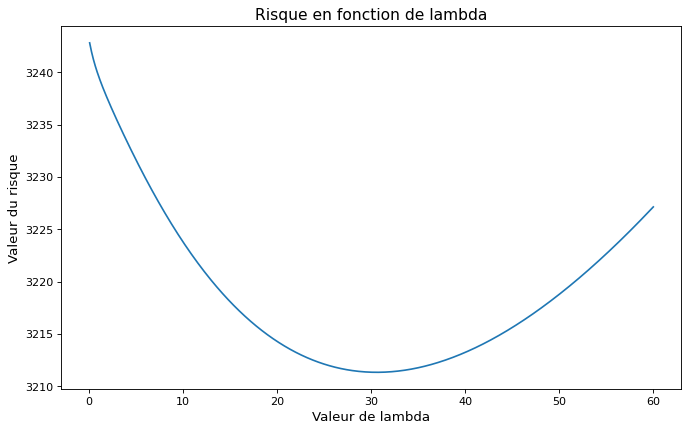

In [42]:

plt.figure(figsize=FIG_SIZE, dpi=80)
plt.plot(lambda_abs, risk)
plt.title("Risque en fonction de lambda", fontsize=14)
plt.xlabel('Valeur de lambda', fontsize=12)
plt.ylabel("Valeur du risque", fontsize=12)
plt.show()

In [52]:
index_min = np.argmin(risk, axis=0)
lambda_ridge = lambda_abs[index_min]

print(
    f'Le lambda optimal vaut {lambda_ridge:.2f} et la valeur minimale du risque est {risk_fold(lambda_ridge):.2f}')


Le lambda optimal vaut 30.60 et la valeur minimale du risque est 3211.35


<hr>

## Question 12

<hr>

> A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé. (1.5 point)

In [68]:
lin_reg_lasso = sklearn.linear_model.LassoCV(cv=5).fit(X_train, Y_train)
residual_lasso = Y_test - lin_reg_lasso.predict(X_test)

risk_lasso = np.sum((residual_lasso) ** 2) / len(Y_test)


In [69]:

print(f'Le paramètre de régularisation de LASSO est : {lin_reg_lasso.alpha_:.2f}\n')
print(
    f'La valeur du risque avec la méthode Lasso est de : {risk_lasso:.2f}')


Le paramètre de régularisation de LASSO est : 4.02

La valeur du risque avec la méthode Lasso est de : 3104.67


<hr>

## Question 13

<hr>

> Donner les variables selectionées par le Lasso. Combien y en a-t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-Square LASSO. (1 point)

In [66]:
lasso_variables_arr = np.nonzero(lin_reg_lasso.coef_)[0]
print(f'Les variables sélectionnées par Lasso sont : {lasso_variables_arr}')
print(f'Ce qui fait au total {len(lasso_variables_arr)} variables.')


Les variables sélectionnées par Lasso sont : [ 23  42  44  82  83  85  95  98 115 122 124 132 136]
Ce qui fait au total 13 variables.


In [78]:
columns = list(lasso_variables_arr)

X = X_train[columns]
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, Y_train)
Y_train_pred = lin_reg.predict(X)

X_t = X_test[columns]
Y_test_pred = lin_reg.predict(X_t)

risk_least_lasso = ((Y_test_pred - Y_test)**2).sum() / len(Y_test)

print(
    f'Le risque de prédiction par méthode Least Squared Lasso est : {risk_least_lasso:.2f}')


Le risque de prédiction par méthode Least Squared Lasso est : 3244.15


<hr>

## Question 14

<hr>

> Les variables initiales du jeu de données sont [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]. Combien le Lasso en a-t-il retrouvé ? (1 point)


In [85]:
k = 0
for i in TRUE_VARIABLES:
    if i in lasso_variables_arr:
        k += 1
print("La méthode Lasso a réussi à déterminer " + str(k) + " variables")


La méthode Lasso a réussi à déterminer 5 variables
